# Jawablah poin-poin assignment berikut
#### perhatikan dengan baik apa yang diminta pada soal

# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan semua metode pada data manipulation berikut :
- a. Filtering
- b. Sorting
- c. Grouping / Aggregasi
- d. Join / Merging
- e. Pivot
- f. Crosstab
- g. Appending
- h. Mengeksplor terkait dengan operasi pada Datetime (week, day, dan sebagainya)
### Notes : Sebelum menjawab permintaan diatas, pertama-tama awali dengan mengajukan pertanyaan analisa terlebih dahulu dan tulis insight dari yang anda dapat.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# untuk plot Q-Q
import scipy.stats as stats
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
len(df.drop_duplicates())/ len(df)

1.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


### Filtering
Filter so that only branch B and city Mandalay becomes the sample

In [7]:
df_filter = (df.Branch == 'B') & (df.City == 'Mandalay')
print(df.loc[df_filter].shape)
df.loc[df_filter].head()

(332, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4


In [8]:
# Alternatively
df.query("Branch == 'B' and City == 'Mandalay'").head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4


In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
for col in df.columns:
    print(f'===={col}====')
    display(df[col].value_counts())

====Invoice ID====


Invoice ID
849-09-3807    1
750-67-8428    1
226-31-3081    1
631-41-3108    1
123-19-1176    1
373-73-7910    1
699-14-3026    1
355-53-5943    1
148-41-7930    1
139-32-4183    1
809-46-1866    1
728-47-9078    1
151-33-7434    1
156-20-0370    1
518-71-6847    1
221-25-5073    1
883-69-1285    1
744-82-9138    1
531-56-4728    1
452-04-8808    1
448-34-8700    1
746-04-1077    1
214-30-2776    1
605-03-2706    1
777-82-7220    1
333-73-7901    1
272-65-1806    1
129-29-8530    1
232-16-2483    1
183-56-6882    1
595-11-5460    1
640-49-2076    1
149-71-6266    1
871-79-8483    1
848-62-7243    1
145-94-9061    1
189-17-4241    1
649-29-6775    1
227-03-5010    1
549-59-1358    1
399-46-5918    1
242-55-6721    1
778-71-5554    1
616-24-2851    1
162-48-8011    1
326-78-5178    1
574-22-5561    1
669-54-1719    1
727-46-3608    1
370-41-7321    1
132-32-9879    1
617-15-4209    1
228-96-1411    1
354-25-5821    1
554-53-8700    1
280-35-5823    1
796-12-2025    1
393-65-2792    1
382

====Branch====


Branch
A    340
B    332
C    328
Name: count, dtype: int64

====City====


City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

====Customer type====


Customer type
Member    501
Normal    499
Name: count, dtype: int64

====Gender====


Gender
Female    501
Male      499
Name: count, dtype: int64

====Product line====


Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

====Unit price====


Unit price
83.77    3
98.70    2
38.60    2
93.96    2
84.05    2
20.01    2
21.12    2
32.32    2
15.50    2
99.96    2
36.36    2
21.58    2
18.08    2
32.25    2
23.75    2
73.05    2
87.87    2
30.61    2
24.74    2
40.30    2
22.01    2
39.62    2
51.94    2
34.56    2
78.38    2
76.40    2
39.75    2
42.57    2
65.94    2
34.42    2
89.48    2
37.15    2
99.82    2
45.38    2
95.54    2
68.71    2
99.69    2
78.31    2
52.89    2
26.26    2
19.15    2
51.34    2
77.68    2
48.50    2
75.88    2
60.95    2
60.30    2
45.58    2
60.87    2
52.42    2
48.63    2
64.08    2
73.47    2
72.88    2
22.32    2
15.80    2
97.48    1
15.28    1
68.93    1
72.61    1
54.67    1
86.04    1
87.98    1
33.20    1
88.63    1
52.59    1
33.52    1
87.67    1
88.36    1
24.89    1
93.72    1
78.07    1
83.78    1
96.58    1
99.42    1
68.12    1
62.62    1
60.88    1
54.92    1
30.12    1
86.72    1
56.11    1
69.12    1
15.37    1
56.69    1
18.93    1
82.63    1
91.40    1
44.59    1
17.87    1

====Quantity====


Quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

====Tax 5%====


Tax 5%
10.3635    2
39.4800    2
12.5700    2
10.3260    2
13.1880    2
9.0045     2
4.1540     2
8.3770     2
22.4280    2
4.4640     2
29.8865    1
20.6520    1
36.7800    1
3.6260     1
8.2260     1
2.8960     1
5.1020     1
11.7375    1
21.5950    1
2.3700     1
11.2005    1
26.1415    1
28.1160    1
24.1255    1
21.7830    1
8.2005     1
4.0300     1
21.5100    1
13.1970    1
3.3200     1
8.6400     1
13.2945    1
21.0360    1
1.6760     1
8.7670     1
22.0900    1
34.9860    1
23.5325    1
35.1315    1
33.5120    1
9.6580     1
19.8840    1
3.4060     1
15.6550    1
27.3960    1
21.9680    1
12.0480    1
4.3360     1
5.6110     1
20.7360    1
1.5370     1
18.7920    1
25.5105    1
5.6790     1
41.3150    1
31.9900    1
11.1475    1
3.5740     1
0.7715     1
1.6160     1
34.3920    1
4.4340     1
35.8400    1
36.1750    1
9.1830     1
3.7110     1
16.7190    1
24.7815    1
7.9050     1
15.1480    1
7.9350     1
3.3470     1
29.2830    1
39.3850    1
0.9165     1
44.7400    1
31.06

====Total====


Total
217.6335     2
829.0800     2
263.9700     2
216.8460     2
276.9480     2
189.0945     2
87.2340      2
175.9170     2
470.9880     2
93.7440      2
627.6165     1
433.6920     1
772.3800     1
76.1460      1
172.7460     1
60.8160      1
107.1420     1
246.4875     1
453.4950     1
49.7700      1
235.2105     1
548.9715     1
590.4360     1
506.6355     1
457.4430     1
172.2105     1
84.6300      1
451.7100     1
277.1370     1
69.7200      1
181.4400     1
279.1845     1
441.7560     1
35.1960      1
184.1070     1
463.8900     1
734.7060     1
494.1825     1
737.7615     1
703.7520     1
202.8180     1
417.5640     1
71.5260      1
328.7550     1
575.3160     1
461.3280     1
253.0080     1
91.0560      1
117.8310     1
435.4560     1
32.2770      1
394.6320     1
535.7205     1
119.2590     1
867.6150     1
671.7900     1
234.0975     1
75.0540      1
16.2015      1
33.9360      1
722.2320     1
93.1140      1
752.6400     1
759.6750     1
192.8430     1
77.9310      1
351.

====Date====


Date
2/7/2019     20
2/15/2019    19
3/2/2019     18
1/8/2019     18
3/14/2019    18
1/25/2019    17
3/5/2019     17
1/26/2019    17
1/23/2019    17
1/19/2019    16
3/19/2019    16
3/9/2019     16
2/25/2019    16
3/20/2019    15
1/31/2019    14
2/27/2019    14
2/2/2019     14
1/27/2019    14
3/3/2019     14
1/28/2019    14
2/3/2019     14
2/6/2019     13
1/14/2019    13
2/17/2019    13
1/15/2019    13
2/9/2019     13
3/26/2019    13
1/24/2019    13
3/4/2019     12
2/5/2019     12
1/29/2019    12
3/15/2019    12
3/12/2019    12
1/1/2019     12
3/10/2019    12
1/5/2019     12
2/8/2019     12
3/8/2019     11
3/11/2019    11
3/30/2019    11
2/4/2019     11
3/6/2019     11
2/10/2019    11
2/22/2019    11
3/24/2019    11
3/23/2019    11
1/17/2019    11
1/12/2019    11
3/22/2019    10
1/16/2019    10
1/13/2019    10
3/1/2019     10
3/27/2019    10
3/13/2019    10
3/28/2019    10
2/20/2019    10
1/20/2019    10
3/16/2019     9
1/7/2019      9
3/7/2019      9
1/10/2019     9
2/24/2019     9
3/2

====Time====


Time
19:48    7
14:42    7
17:38    6
17:36    5
19:39    5
17:16    5
11:40    5
10:11    5
19:30    5
11:51    5
13:48    5
19:44    5
19:20    5
13:58    5
10:55    4
15:10    4
12:46    4
10:17    4
18:37    4
12:40    4
15:42    4
18:43    4
12:43    4
16:23    4
15:31    4
12:45    4
18:45    4
13:24    4
10:33    4
14:04    4
19:06    4
12:02    4
16:28    4
10:54    4
18:19    4
18:03    4
20:24    4
13:05    4
16:19    4
10:36    4
19:57    4
19:42    4
19:17    4
11:36    4
10:25    4
10:23    4
18:14    4
19:01    4
11:26    4
20:29    4
13:22    4
10:43    4
11:32    4
15:29    4
15:06    3
12:28    3
13:01    3
19:38    3
17:59    3
11:52    3
10:38    3
20:21    3
18:22    3
13:45    3
15:01    3
17:04    3
15:48    3
16:24    3
20:37    3
13:53    3
19:07    3
15:28    3
12:52    3
10:31    3
13:40    3
14:35    3
12:07    3
20:03    3
15:55    3
10:39    3
12:20    3
11:15    3
15:36    3
15:27    3
14:19    3
17:24    3
14:13    3
10:18    3
18:10    3
20:35    3
15:08

====Payment====


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

====cogs====


cogs
207.27    2
789.60    2
251.40    2
206.52    2
263.76    2
180.09    2
83.08     2
167.54    2
448.56    2
89.28     2
597.73    1
413.04    1
735.60    1
72.52     1
164.52    1
57.92     1
102.04    1
234.75    1
431.90    1
47.40     1
224.01    1
522.83    1
562.32    1
482.51    1
435.66    1
164.01    1
80.60     1
430.20    1
263.94    1
66.40     1
172.80    1
265.89    1
420.72    1
33.52     1
175.34    1
441.80    1
699.72    1
470.65    1
702.63    1
670.24    1
193.16    1
397.68    1
68.12     1
313.10    1
547.92    1
439.36    1
240.96    1
86.72     1
112.22    1
414.72    1
30.74     1
375.84    1
510.21    1
113.58    1
826.30    1
639.80    1
222.95    1
71.48     1
15.43     1
32.32     1
687.84    1
88.68     1
716.80    1
723.50    1
183.66    1
74.22     1
334.38    1
495.63    1
158.10    1
302.96    1
158.70    1
66.94     1
585.66    1
787.70    1
18.33     1
894.80    1
621.20    1
145.56    1
455.46    1
672.03    1
416.50    1
441.36    1
783.10    1

====gross margin percentage====


gross margin percentage
4.761905    1000
Name: count, dtype: int64

====gross income====


gross income
10.3635    2
39.4800    2
12.5700    2
10.3260    2
13.1880    2
9.0045     2
4.1540     2
8.3770     2
22.4280    2
4.4640     2
29.8865    1
20.6520    1
36.7800    1
3.6260     1
8.2260     1
2.8960     1
5.1020     1
11.7375    1
21.5950    1
2.3700     1
11.2005    1
26.1415    1
28.1160    1
24.1255    1
21.7830    1
8.2005     1
4.0300     1
21.5100    1
13.1970    1
3.3200     1
8.6400     1
13.2945    1
21.0360    1
1.6760     1
8.7670     1
22.0900    1
34.9860    1
23.5325    1
35.1315    1
33.5120    1
9.6580     1
19.8840    1
3.4060     1
15.6550    1
27.3960    1
21.9680    1
12.0480    1
4.3360     1
5.6110     1
20.7360    1
1.5370     1
18.7920    1
25.5105    1
5.6790     1
41.3150    1
31.9900    1
11.1475    1
3.5740     1
0.7715     1
1.6160     1
34.3920    1
4.4340     1
35.8400    1
36.1750    1
9.1830     1
3.7110     1
16.7190    1
24.7815    1
7.9050     1
15.1480    1
7.9350     1
3.3470     1
29.2830    1
39.3850    1
0.9165     1
44.7400    1

====Rating====


Rating
6.0     26
6.6     24
9.5     22
4.2     22
5.1     21
6.5     21
8.0     21
5.0     21
6.2     21
7.6     20
8.7     20
7.0     20
6.7     19
9.8     19
5.5     19
7.2     18
7.7     18
7.3     18
4.9     18
4.3     18
7.9     18
8.4     18
8.5     18
8.6     18
4.4     17
5.9     17
4.5     17
9.6     17
4.1     17
8.9     16
9.2     16
9.3     16
7.1     16
7.4     16
9.9     16
6.4     16
5.6     16
7.8     15
6.3     15
6.9     15
5.2     15
9.0     15
9.1     14
5.8     14
5.7     14
8.8     14
9.7     14
5.4     14
6.1     14
8.2     14
7.5     13
6.8     13
4.8     13
8.1     13
9.4     12
4.7     12
5.3     11
8.3     11
4.0     11
4.6      8
10.0     5
Name: count, dtype: int64

### Sorting
Sort so that we can see the order of product that has the highest sales to lowest sales average, which is total/quantity

In [11]:
# Urutkan rata-rata penjualan
df['Sales_per_unit'] = df['Total']/df['Quantity']
product_avg_sales = df.groupby('Product line')['Sales_per_unit'].mean().sort_values(ascending=False).reset_index()
product_avg_sales

,Product line,Sales_per_unit
0,Fashion accessories,60.011334
1,Sports and travel,59.842916
2,Food and beverages,58.809293
3,Home and lifestyle,58.082784
4,Health and beauty,57.597197
5,Electronic accessories,56.229168


### Grouping/Aggregation

In [12]:
# City with most total product sold
city_quantity = df.groupby('City')['Quantity'].sum().reset_index()
city_quantity

,City,Quantity
0,Mandalay,1820
1,Naypyitaw,1831
2,Yangon,1859


In [13]:
# Cabang dan produk mana yang memiliki total barang terjual yang paling banyak?
prod_branch_quantity = df.groupby(['Branch', 'Product line'])['Quantity'].sum().reset_index()
prod_branch_quantity

,Branch,Product line,Quantity
0,A,Electronic accessories,322
1,A,Fashion accessories,263
2,A,Food and beverages,313
3,A,Health and beauty,257
4,A,Home and lifestyle,371
5,A,Sports and travel,333
6,B,Electronic accessories,316
7,B,Fashion accessories,297
8,B,Food and beverages,270
9,B,Health and beauty,320


In [14]:
# Kelompokkan berdasarkan kota dan jenis produk, 
# dapatkan jumlah barang terjual dan total transaksi
# Lakukan mean, count dan sum dari kedua variabel
df.groupby(['City', 'Product line'])[['Total','Quantity']].agg(['sum', 'mean', 'count']).reset_index()

City            Product line       Total                   Quantity  \
                                              sum        mean count      sum   
0    Mandalay  Electronic accessories  17051.4435  310.026245    55      316   
1    Mandalay     Fashion accessories  16413.3165  264.730911    62      297   
2    Mandalay      Food and beverages  15214.8885  304.297770    50      270   
3    Mandalay       Health and beauty  19980.6600  376.993585    53      320   
4    Mandalay      Home and lifestyle  17549.1645  350.983290    50      295   
5    Mandalay       Sports and travel  19988.1990  322.390306    62      322   
6   Naypyitaw  Electronic accessories  18968.9745  344.890445    55      333   
7   Naypyitaw     Fashion accessories  21560.0700  331.693385    65      342   
8   Naypyitaw      Food and beverages  23766.8550  360.103864    66      369   
9   Naypyitaw       Health and beauty  16615.3260  319.525500    52      277   
10  Naypyitaw      Home and lifestyle  13895.5530  308.790067    45      245   
11  Naypyitaw       Sports and travel  15761.9280  350.265067    45      265   
12     Yangon  Electronic accessories  18317.1135  305.285225    60      322   
13     Yangon     Fashion accessories  16332.5085  320.245265    51      263   
14     Yangon      Food and beverages  17163.1005  295.915526    58      313   
15     Yangon       Health and beauty  12597.7530  268.037298    47      257   
16     Yangon      Home and lifestyle  22417.1955  344.879931    65      371   
17     Yangon       Sports and travel  19372.6995  328.350839    59      333   

                    
        mean count  
0   5.745455    55  
1   4.790323    62  
2   5.400000    50  
3   6.037736    53  
4   5.900000    50  
5   5.193548    62  
6   6.054545    55  
7   5.261538    65  
8   5.590909    66  
9   5.326923    52  
10  5.444444    45  
11  5.888889    45  
12  5.366667    60  
13  5.156863    51  
14  5.396552    58  
15  5.468085    47  
16  5.707692    65  
17  5.644068    59

### Join/Merging

#### Use the additional dataset given

In [15]:
df_prod = pd.read_csv('product_info.csv')
df_prod

,Product line,Category,Supplier,Warranty (months)
0,Health and beauty,Beauty,Supplier A,12
1,Electronic accessories,Electronics,Supplier B,24
2,Home and lifestyle,Home,Supplier C,18


In [16]:
# merging df and df_prod!!!
sales_prod = df.merge(df_prod, on='Product line', how='left')
sales_prod.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales_per_unit,Category,Supplier,Warranty (months)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,78.4245,Beauty,Supplier A,12.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,16.0440,Electronics,Supplier B,24.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,48.6465,Home,Supplier C,18.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,61.1310,Beauty,Supplier A,12.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,90.6255,NaN,NaN,NaN


In [17]:
df_branch = pd.read_csv('branch_info.csv')
df_branch

,Branch,Region,Manager,Opened Year
0,A,South,Alice,2015
1,B,Central,Bob,2017
2,C,North,Charlie,2016


In [18]:
# merging df and df_branch!!!
sales_branch = df.merge(df_branch, on='Branch', how='left')
sales_branch.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales_per_unit,Region,Manager,Opened Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,78.4245,South,Alice,2015
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,16.0440,North,Charlie,2016
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,48.6465,South,Alice,2015
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,61.1310,South,Alice,2015
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,90.6255,South,Alice,2015


In [19]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales_per_unit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,78.4245
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,16.0440
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,48.6465


In [20]:
# Get average revenue per transaction of each product
product_total_summary = df.groupby('Product line')['Total'].mean().reset_index()
product_total_summary.columns = ['Product line', 'Avg_Total']

df_merged = df.merge(product_total_summary, on='Product line', how='left')
df_merged[['Product line', 'Total', 'Avg_Total']].head()

,Product line,Total,Avg_Total
0,Health and beauty,548.9715,323.643020
1,Electronic accessories,80.2200,319.632538
2,Home and lifestyle,340.5255,336.636956
3,Health and beauty,489.0480,323.643020
4,Sports and travel,634.3785,332.065220


In [21]:
product_total_summary

,Product line,Avg_Total
0,Electronic accessories,319.632538
1,Fashion accessories,305.089298
2,Food and beverages,322.671517
3,Health and beauty,323.643020
4,Home and lifestyle,336.636956
5,Sports and travel,332.065220


In [22]:
# Create a summary per invoice (even if each invoice is unique)
invoice_summary = df.groupby('Invoice ID')[['Quantity', 'Total']].sum().reset_index()
invoice_summary.columns = ['Invoice ID', 'Total_Quantity_by_Invoice', 'Total_Revenue_by_Invoice']

df_merged = df.merge(invoice_summary, on='Invoice ID', how='left')
df_merged[['Invoice ID', 'Quantity', 'Total_Quantity_by_Invoice', 'Total', 'Total_Revenue_by_Invoice']].head()

,Invoice ID,Quantity,Total_Quantity_by_Invoice,Total,Total_Revenue_by_Invoice
0,750-67-8428,7,7,548.9715,548.9715
1,226-31-3081,5,5,80.2200,80.2200
2,631-41-3108,7,7,340.5255,340.5255
3,123-19-1176,8,8,489.0480,489.0480
4,373-73-7910,7,7,634.3785,634.3785


### Pivot

Bagaimana cek total pajak tiap produk di tiap kota?

In [23]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales_per_unit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,78.4245
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,16.0440
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,48.6465
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,61.1310
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,90.6255


In [24]:
pd.pivot_table(df, index='Product line', columns='City', values='Tax 5%')

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,14.763155,16.423355,14.537392
Fashion accessories,12.606234,15.794923,15.249775
Food and beverages,14.490370,17.147803,14.091216
Health and beauty,17.952075,15.215500,12.763681
Home and lifestyle,16.713490,14.704289,16.422854
Sports and travel,15.351919,16.679289,15.635754


In [25]:
# Pivot table menunjukkan pajak tiap produk yang ditanggung pria dan wanita utk tiap cabang
pd.pivot_table(df, index='Product line', columns=['Branch','Gender'], values='Tax 5%')

Branch                          A                     B                     C  \
Gender                     Female       Male     Female       Male     Female   
Product line                                                                    
Electronic accessories  16.949482  12.426813  13.888625  15.670074  15.253768   
Fashion accessories     16.728268  13.449870  13.104606  12.039121  15.673043   
Food and beverages      14.492261  13.827671  17.257793  10.668690  19.625513   
Health and beauty       12.958952  12.605962  15.238925  19.596409  13.345217   
Home and lifestyle      18.804781  14.113106  20.686432  13.591893  14.938920   
Sports and travel       13.325414  17.869083  14.623517  16.034797  18.467534   

Branch                             
Gender                       Male  
Product line                       
Electronic accessories  17.636259  
Fashion accessories     15.937117  
Food and beverages      13.785196  
Health and beauty       16.698828  
Home and lifestyle      14.411000  
Sports and travel       13.438094

### Crosstab
Manajer ingin tau untuk tipe customer yang berbeda apakah ada dominant gender untuk targeted promotion

Manajer ingin tau produk yang populer di tiap kota

In [26]:
crosstab = pd.crosstab(df['Customer type'], df['Gender'])
crosstab

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


In [27]:
ctab = pd.crosstab(df['City'], df['Product line'])
ctab

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,55,62,50,53,50,62
Naypyitaw,55,65,66,52,45,45
Yangon,60,51,58,47,65,59


In [28]:
ctabs = pd.crosstab(index=[df['City'], df['Branch']], columns=df['Product line'], values=df['Product line'], aggfunc='count')
ctabs

,Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,Branch,,,,,,
Mandalay,B,55,62,50,53,50,62
Naypyitaw,C,55,65,66,52,45,45
Yangon,A,60,51,58,47,65,59


### Appending

Penggunaan pd.concat() utk vertical. Also use the additional dataset.

In [31]:
#concat branch of shops
branch_a = df[df['Branch'] == 'A'].copy()
branch_b = df[df['Branch'] == 'B'].copy()

# Add a column to identify each group
branch_a['Branch_Name'] = 'A'
branch_b['Branch_Name'] = 'B'

# Combine both for side-by-side analysis
combined = pd.concat([branch_a, branch_b], ignore_index=True)
combined

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales_per_unit,Branch_Name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,78.4245,A
1,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,48.6465,A
2,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,61.1310,A
3,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,90.6255,A
4,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,72.2820,A
5,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,38.0730,A
6,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1,49.2975,A
7,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2/7/2019,16:48,Ewallet,431.90,4.761905,21.5950,8.2,45.3495,A
8,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7,74.9490,A
9,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6,72.3765,A


In [32]:
# compare female and male
female = df[df['Gender'] == 'Female'].copy()
male   = df[df['Gender'] == 'Male'].copy()

female['Group'] = 'Female'
male['Group'] = 'Male'

gender_compare = pd.concat([female, male], ignore_index=True)
gender_compare

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales_per_unit,Group
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,78.4245,Female
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,16.0440,Female
2,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,72.2820,Female
3,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,77.2380,Female
4,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,38.0730,Female
5,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,57.5820,Female
6,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2/6/2019,18:07,Ewallet,57.92,4.761905,2.8960,4.5,15.2040,Female
7,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1,49.2975,Female
8,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7,74.9490,Female
9,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5,98.4060,Female


### Working Date

In [33]:
df[['Date', 'Time']].head()

,Date,Time
0,1/5/2019,13:08
1,3/8/2019,10:29
2,3/3/2019,13:23
3,1/27/2019,20:33
4,2/8/2019,10:37


In [34]:
df[['Date','Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1000 non-null   object
 1   Time    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [35]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [36]:
# fungsi nama bulan
def month_name(x):
    if x == 1:
        return 'januari'
    elif x == 2:
        return 'februari'
    elif x == 3:
        return 'maret'
    elif x == 4:
        return 'april'
    elif x == 5:
        return 'mei'
    elif x == 6:
        return 'juni'
    elif x == 7:
        return 'juli'
    elif x == 8:
        return 'agust'
    elif x == 9:
        return 'sept'
    elif x == 10:
        return 'okt'
    elif x == 11:
        return 'nov'
    else:
        return 'desember'

In [37]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['month_name'] = df['Month'].apply(lambda x: month_name(x))
df['year'] = df['Date'].dt.year
df[['year','Month','month_name','DayOfWeek','Date']].head()

,year,Month,month_name,DayOfWeek,Date
0,2019,1,januari,Saturday,2019-01-05
1,2019,3,maret,Friday,2019-03-08
2,2019,3,maret,Sunday,2019-03-03
3,2019,1,januari,Sunday,2019-01-27
4,2019,2,februari,Friday,2019-02-08


In [38]:
# Total sales per day of week
df.groupby('DayOfWeek')['Total'].sum().sort_values(ascending=False)

DayOfWeek
Saturday     56120.8095
Tuesday      51482.2455
Thursday     45349.2480
Sunday       44457.8925
Friday       43926.3405
Wednesday    43731.1350
Monday       37899.0780
Name: Total, dtype: float64

In [39]:
df.groupby('Time')['Total'].sum().sort_values(ascending=False)

Time
14:42    2534.6370
13:48    2513.0700
17:16    2324.3745
13:00    2322.8100
15:42    2266.4985
10:33    2156.9940
16:19    2142.7140
19:48    2033.1255
11:23    1953.9975
11:40    1906.2330
15:01    1899.5130
11:25    1845.4800
11:36    1820.2800
12:43    1817.3400
19:01    1802.1675
11:51    1787.9505
19:30    1734.2220
19:57    1733.2245
20:24    1692.0015
19:39    1673.6475
12:46    1670.7810
20:51    1654.3275
14:36    1650.6840
10:54    1647.2295
19:06    1614.8055
10:43    1613.4825
15:12    1550.9130
18:22    1546.2405
19:09    1538.2395
15:07    1535.9610
15:55    1534.1235
12:52    1529.3775
17:26    1505.7000
19:38    1497.5310
16:24    1487.3145
13:05    1457.0010
15:28    1439.1615
10:25    1434.5205
13:58    1412.5860
10:55    1409.9610
19:42    1408.7115
11:12    1394.3895
14:19    1389.6540
10:38    1386.9555
20:35    1382.6400
14:53    1378.3875
17:24    1371.9195
11:15    1368.5700
19:08    1350.5100
13:22    1335.3900
11:28    1323.4200
12:45    1305.0975
11:32  

<Axes: title={'center': 'Total Sales per Day'}, xlabel='Date'>

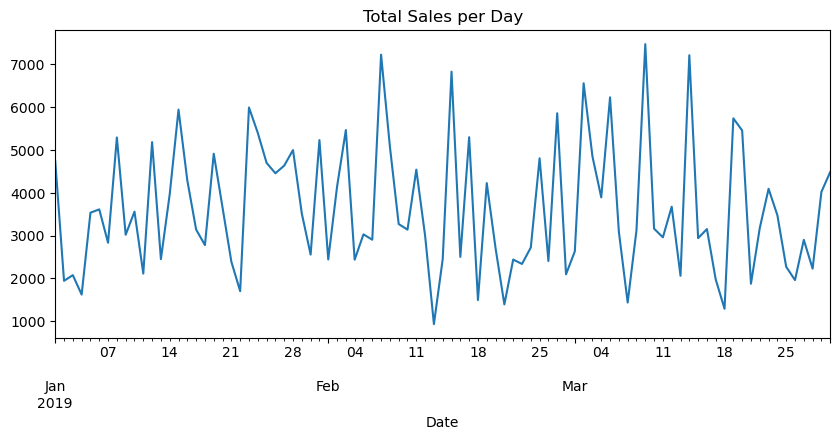

In [40]:
# Daily revenue trend
df.groupby('Date')['Total'].sum().plot(title='Total Sales per Day', figsize=(10, 4))

In [41]:
# Fungsi untuk mengkategorikan waktu
def categorize_time(time):
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Pagi'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('15:00:00').time():
        return 'Siang'
    elif time >= pd.to_datetime('15:00:00').time() and time < pd.to_datetime('18:00:00').time():
        return 'Sore'
    else:
        return 'Malam'

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Waktu'] = df['Time'].apply(categorize_time)
df[['Waktu','Time']].head()

,Waktu,Time
0,Siang,13:08:00
1,Pagi,10:29:00
2,Siang,13:23:00
3,Malam,20:33:00
4,Pagi,10:37:00


# 2. Standar Scaler for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [42]:
columns_to_stdscaler = ['Total', 'Unit price']
scaler = StandardScaler()
df[['Total_stds','Unit price_stds']] = scaler.fit_transform(df[columns_to_stdscaler])

In [43]:
print(df[columns_to_stdscaler].dtypes)

Total         float64
Unit price    float64
dtype: object


In [44]:
df[['Total', 'Unit price', 'Total_stds', 'Unit price_stds']].head()

,Total,Unit price,Total_stds,Unit price_stds
0,548.9715,74.69,0.919607,0.718160
1,80.2200,15.28,-0.987730,-1.525303
2,340.5255,46.33,0.071446,-0.352781
3,489.0480,58.22,0.675780,0.096214
4,634.3785,86.31,1.267125,1.156959


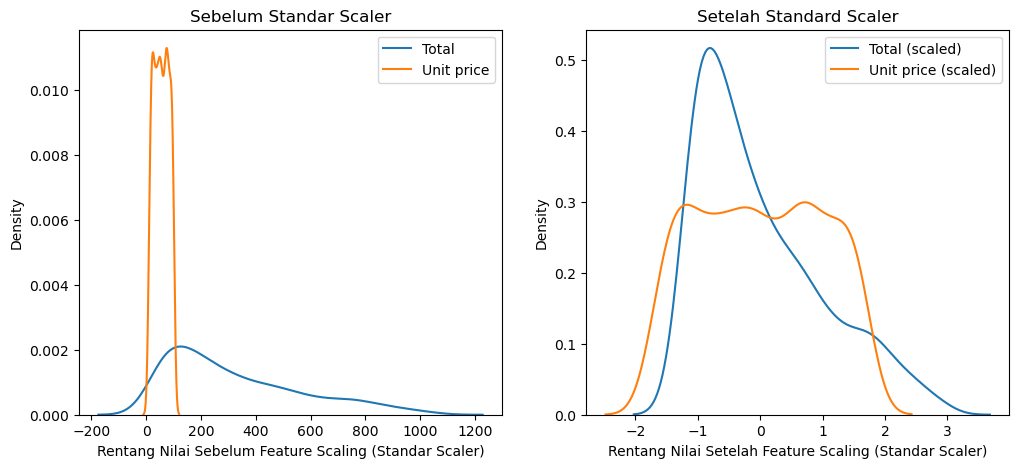

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaler')
sns.kdeplot(df['Total'], ax=ax1, label='Total')
sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaler')
sns.kdeplot(df['Total_stds'], ax=ax2, label='Total (scaled)')
sns.kdeplot(df['Unit price_stds'], ax=ax2, label='Unit price (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scaling (Standar Scaler)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scaling (Standar Scaler)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

### Insight dari Standard Scaler EDA?
Dari grafik distribusi sebelah kiri, ketika belum discaling, kolom Total dan Unit price memiliki skala yang berjauhan dengan puncak dari grafik total jauh lebih rendah dari puncak. Selain itu, Total memiliki rentang nilai yang jauh lebih besar daripada Unit price, sehingga distribusi Unit price tampak sangat sempit dan "tertekan" ke tengah. 
Setelah discaling dengan 'Standard Scaler', di grafik kanan, kedua variabel berhasil ditransformasikan menjadi distribusi dengan rata-rata 0 dan standar deviasi $\approx$ 1. Kedua grafik sekarang memiliki skala yang dapat dibandingkan untuk studi lanjut tanpa fitur yang dominan. Setelah discaling, 'Total' tetap terlihat right skewed sekalipun nilai outliernya sudah di remove dengan scaling. Sementara itu, 'Unit price' memiliki distribusi simetris mendekati normal.

Standard scaling kali ini bekerja dengan membagi x-axis dengan 100 dan mengalikan y-axis dengan 100.

In [46]:
df[['Total', 'Total_stds']].head()

,Total,Total_stds
0,548.9715,0.919607
1,80.2200,-0.987730
2,340.5255,0.071446
3,489.0480,0.675780
4,634.3785,1.267125


In [47]:
df[['Total', 'Total_stds']].describe()

,Total,Total_stds
count,1000.000000,1.000000e+03
mean,322.966749,3.197442e-17
std,245.885335,1.000500e+00
min,10.678500,-1.270692e+00
25%,124.422375,-8.078714e-01
50%,253.848000,-2.812422e-01
75%,471.350250,6.037682e-01
max,1042.650000,2.928371e+00


In [48]:
df_branch = pd.read_csv('branch_info.csv')
df_branch.head()

,Branch,Region,Manager,Opened Year
0,A,South,Alice,2015
1,B,Central,Bob,2017
2,C,North,Charlie,2016


In [49]:
df_product = pd.read_csv('product_info.csv')
df_product.head()

,Product line,Category,Supplier,Warranty (months)
0,Health and beauty,Beauty,Supplier A,12
1,Electronic accessories,Electronics,Supplier B,24
2,Home and lifestyle,Home,Supplier C,18


# 3. MinMax Scaler for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [50]:
columns_to_minmax = ['Total', 'Unit price']
minmax = MinMaxScaler()
df[['Total_minmax', 'Unit price_minmax']] = minmax.fit_transform(df[columns_to_minmax])

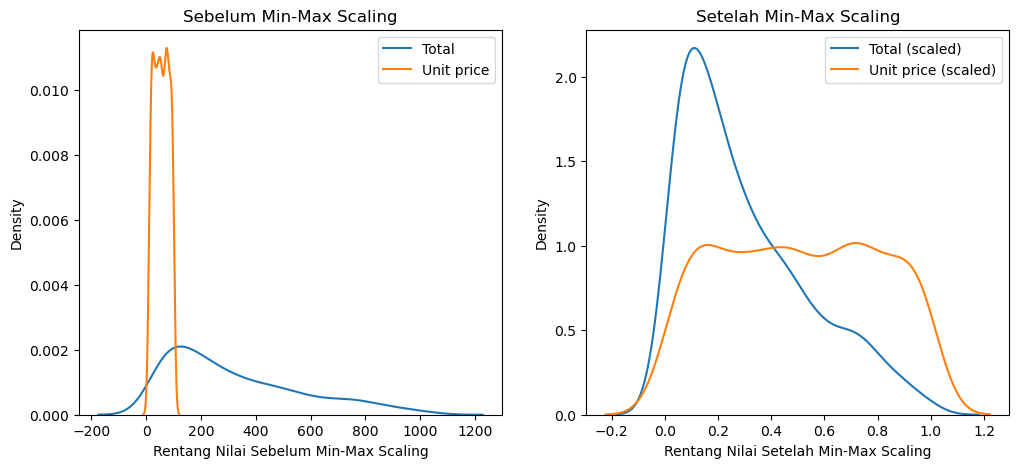

In [51]:
# Plot dist sblm dan sesudah MinMax Scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Min-Max Scaling
ax1.set_title('Sebelum Min-Max Scaling')
sns.kdeplot(df['Total'], ax=ax1, label='Total')
sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')
# sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Min-Max Scaling')
sns.kdeplot(df['Total_minmax'], ax=ax2, label='Total (scaled)')
sns.kdeplot(df['Unit price_minmax'], ax=ax2, label='Unit price (scaled)')
# sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Min-Max Scaling')
ax2.set_xlabel('Rentang Nilai Setelah Min-Max Scaling')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

### Insight dari MinMax Scaler EDA?

Pada grafik kiri sebelum discaling, Total memiliki distribusi yang jauh lebih lebar dibandingkan Unit price, yang menyebabkan Unit price tampak sangat sempit dan kurang informatif jika dibandingkan langsung. Sementara itu, min-max scaler memetakan y-axis atau distribusi ke [0,1]. Tentu saja setelah discale, 'Total' tetap right-skewed, sementara nilai-nilai 'Unit price' berpusat di tengah dan tersebar merata. MinMaxScaler akan berguna pada kasus di mana skala absolut antar fitur sangat berbeda, contohnya dalam algoritma machine learning seperti K-Nearest Neighbors atau Neural Network.